### Implementing simple chatbot using LangGraph

In [3]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END

#Reducers
from typing import Annotated
from langgraph.graph.message import add_messages


In [4]:
class State(TypedDict):
    messages:Annotated[list,add_messages]

In [5]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ['GROQ_API_KEY']=os.getenv("GROQ_API_KEY")
os.environ['OPENAI_API_KEY']=os.getenv("OPENAI_API_KEY")


In [6]:
from langchain_openai import ChatOpenAI
llm=ChatOpenAI(model="gpt-4o")
llm.invoke("Hello")

/home/maniram/workspace/python/langchain-projects/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


AIMessage(content='Hi there! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 8, 'total_tokens': 18, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_a0e9480a2f', 'id': 'chatcmpl-CvnDinou9qGemtmgbOY5gAVBmn9bk', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--019b9e73-9438-7603-a651-812ce4c23eec-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 8, 'output_tokens': 10, 'total_tokens': 18, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [8]:
from langchain_groq import ChatGroq
llm_groq=ChatGroq(model="qwen/qwen3-32b")
llm_groq.invoke("Hey, I am Krish and I like to play cricket")

AIMessage(content="<think>\nOkay, let's see. The user introduced himself as Krish and mentioned he likes to play cricket. I need to respond appropriately.\n\nFirst, I should acknowledge his introduction and express enthusiasm about cricket. Maybe ask about his role in the game, like batting, bowling, or fielding. That shows interest in his personal experience.\n\nAlso, I can mention some popular aspects of cricket, like famous players or exciting matches, to connect with him. It's good to keep the tone friendly and open-ended to encourage further conversation.\n\nI should check if there's anything else he wants to discuss related to cricket. Maybe he has a favorite team or a memorable game. Including some emojis could make the response more engaging and playful.\n\nWait, but I need to make sure the response is concise and not too long. Let me structure it step by step: greet him, express interest in cricket, ask about his role, mention some cricket elements, and invite him to share mor

In [9]:

def superbot(state:State):
    return {"messages":[llm_groq.invoke(state['messages'])]}


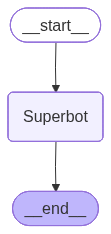

In [14]:
graph=StateGraph(State)

graph.add_node("Superbot",superbot)

#add edges

graph.add_edge(START,"Superbot")
graph.add_edge("Superbot",END)


graph_builder = graph.compile()

#Display
from IPython.display import Image,display
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [15]:
## Invocation

graph_builder.invoke({'messages':"Hi, my nam is Krish and i like cricket"})

{'messages': [HumanMessage(content='Hi, my nam is Krish and i like cricket', additional_kwargs={}, response_metadata={}, id='639220c5-4a25-4776-ab8d-9d0802bd8543'),
  AIMessage(content='<think>\nOkay, let\'s see. The user is Krish and he mentioned he likes cricket. First, I should acknowledge his greeting and correct the typo in his name. Wait, he wrote "my nam is Krish" so "nam" is probably a typo for "name". I should point that out in a friendly way.\n\nHe likes cricket, so maybe he wants to talk about the sport. I should ask him what aspect of cricket he\'s interested in. Maybe he plays it, follows a team, or has favorite players. Also, since he\'s from India or another country where cricket is popular, perhaps there\'s a specific team or recent matches he\'s interested in. I should keep the response open-ended to encourage him to elaborate. Let me make sure the response is welcoming and invites further conversation.\n</think>\n\nHi Krish! Nice to meet you. 🏏 I notice you mentioned 

### Streaming the responses

In [21]:
for event in graph_builder.stream({"messages":"Hrllo my name is maniram"},stream_mode="values"):
    print(event)

{'messages': [HumanMessage(content='Hrllo my name is maniram', additional_kwargs={}, response_metadata={}, id='b51c4dc7-7d04-42e6-8299-e2c68403bd48')]}
{'messages': [HumanMessage(content='Hrllo my name is maniram', additional_kwargs={}, response_metadata={}, id='b51c4dc7-7d04-42e6-8299-e2c68403bd48'), AIMessage(content='<think>\nOkay, the user greeted me with "Hrllo my name is maniram". First, I need to correct the typo in their greeting. "Hrllo" is probably a misspelling of "Hello". So I should respond with a friendly greeting to acknowledge them. \n\nNext, they mentioned their name is Maniram. I should make sure to address them by their name to make the interaction personal. Maybe say something like "Hello, Maniram!" to confirm their name.\n\nI should ask them how I can assist to encourage further conversation. It\'s important to keep the tone welcoming and open-ended so they feel comfortable to ask questions or share what they need help with.\n\nI also need to check if there\'s anyt